# Phase 2 Data Cleaning

In this file, we proceed to clean up the dataset that we have. 

## tip.json

In [1]:
import json
tip = [json.loads(line) for line in open('tipTEST.json', 'r')]     # create a dictionary to read in the json objects of the tip file
print (tip[0]) # print out the first entry of the tip dataset for debugging purpose

{'user_id': 'hf27xTME3EiCp6NL6VtWZQ', 'business_id': 'UYX5zL_Xj9WEc_Wp-FrqHw', 'text': 'Here for a quick mtg', 'date': '2013-11-26 18:20:08', 'compliment_count': 0}


In [2]:
#print out the key term
test = tip[0]
test.keys()

dict_keys(['user_id', 'business_id', 'text', 'date', 'compliment_count'])

In [3]:
#load the data into data frame in order to process and clean up
import pandas as pd

tip_df = pd.json_normalize (tip)

#test compliment counts for the business
tip_df['compliment_count'].value_counts()

0    20838
1      296
2       18
3        4
5        1
Name: compliment_count, dtype: int64

In [4]:
tip_df.head()

,user_id,business_id,text,date,compliment_count
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0


>We can use the business id in this datafram to look up the name and location of the business in the business file

## checkin.json

In [5]:
checkin = [json.loads(line) for line in open('checkinTEST.json', 'r')]     # create a dictionary to read in the json objects of the tip file
print (checkin[0]) # print out the first entry of the tip dataset for debugging purpose

{'business_id': '--1UhMGODdWsrMastO9DZw', 'date': '2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016-10-15 02:45:18, 2016-11-18 01:54:50, 2017-04-20 18:39:06, 2017-05-03 17:58:02, 2019-03-19 22:04:48'}


In [6]:
#print out the key term
test = checkin[0]
test.keys()

dict_keys(['business_id', 'date'])

In [7]:
checkin_df = pd.json_normalize (checkin)

In [8]:
checkin_df.head()

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


> Do we need this?

## review.json

In [9]:
review = [json.loads(line) for line in open('ReviewTEST.json', 'r')]     # create a dictionary to read in the json objects of the tip file
print (review[0]) # print out the first entry of the tip dataset for debugging purpose

{'review_id': 'xQY8N_XvtGbearJ5X4QryQ', 'user_id': 'OwjRMXRC0KyPrIlcjaXeFQ', 'business_id': '-MhfebM0QIsKt87iDN-FNw', 'stars': 2.0, 'useful': 5, 'funny': 0, 'cool': 0, 'text': 'As someone who has worked with many museums, I was eager to visit this gallery on my most recent trip to Las Vegas. When I saw they would be showing infamous eggs of the House of Faberge from the Virginia Museum of Fine Arts (VMFA), I knew I had to go!\n\nTucked away near the gelateria and the garden, the Gallery is pretty much hidden from view. It\'s what real estate agents would call "cozy" or "charming" - basically any euphemism for small.\n\nThat being said, you can still see wonderful art at a gallery of any size, so why the two *s you ask? Let me tell you:\n\n* pricing for this, while relatively inexpensive for a Las Vegas attraction, is completely over the top. For the space and the amount of art you can fit in there, it is a bit much.\n* it\'s not kid friendly at all. Seriously, don\'t bring them.\n* the

In [10]:
print (review[1])

{'review_id': 'UmFMZ8PyXZTY2QcwzsfQYA', 'user_id': 'nIJD_7ZXHq-FX8byPMOkMQ', 'business_id': 'lbrU8StCq3yDfr-QMnGrmQ', 'stars': 1.0, 'useful': 1, 'funny': 1, 'cool': 0, 'text': 'I am actually horrified this place is still in business. My 3 year old son needed a haircut this past summer and the lure of the $7 kids cut signs got me in the door. We had to wait a few minutes as both stylists were working on people. The decor in this place is total garbage. It is so tacky. The sofa they had at the time was a pleather sofa with giant holes in it. And my son noticed ants crawling all over the floor and the furniture. It was disgusting and I should have walked out then. Actually, I should have turned around and walked out upon entering but I didn\'t. So the older black male stylist finishes the haircut he was doing and it\'s our turn. I tell him I want a #2 clipper around the back and sides and then hand cut the top into a standard boys cut. Really freaking simple, right? WRONG! Rather than use

In [11]:
#print out the key term
test = review[0]
test.keys()

dict_keys(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date'])

In [12]:
review_df = pd.json_normalize (review)

In [13]:
print(review_df.head(5))

                review_id                 user_id             business_id  \
0  xQY8N_XvtGbearJ5X4QryQ  OwjRMXRC0KyPrIlcjaXeFQ  -MhfebM0QIsKt87iDN-FNw   
1  UmFMZ8PyXZTY2QcwzsfQYA  nIJD_7ZXHq-FX8byPMOkMQ  lbrU8StCq3yDfr-QMnGrmQ   
2  LG2ZaYiOgpr2DK_90pYjNw  V34qejxNsCbcgD8C0HVk-Q  HQl28KMwrEKHqhFrrDqVNQ   
3  i6g_oA9Yf9Y31qt0wibXpw  ofKDkJKXSKZXu5xJNGiiBQ  5JxlZaqCnk1MnbgRirs40Q   
4  6TdNDKywdbjoTkizeMce8A  UgMW8bLE0QMJDCkQ1Ax5Mg  IS4cv902ykd8wj1TR0N3-A   

   stars  useful  funny  cool  \
0    2.0       5      0     0   
1    1.0       1      1     0   
2    5.0       1      0     0   
3    1.0       0      0     0   
4    4.0       0      0     0   

                                                text                 date  
0  As someone who has worked with many museums, I...  2015-04-15 05:21:16  
1  I am actually horrified this place is still in...  2013-12-07 03:16:52  
2  I love Deagan's. I do. I really do. The atmosp...  2015-12-05 03:18:11  
3  Dismal, lukewarm, defrosted-tas

# business

#### - First lets convert the business jason file into a dataframe so we can start the cleaning process

In [14]:
business = [json.loads(line) for line in open('businessTEST2.json', 'r')]     # create a dictionary to read in the json objects of the tip file
print (business[0])

{'business_id': 'f9NumwFMBDn751xgFiRbNA', 'name': 'The Range At Lake Norman', 'address': '10913 Bailey Rd', 'city': 'Cornelius', 'state': 'NC', 'postal_code': '28031', 'latitude': 35.4627242, 'longitude': -80.8526119, 'stars': 3.5, 'review_count': 36, 'is_open': 1, 'attributes': {'BusinessAcceptsCreditCards': 'True', 'BikeParking': 'True', 'GoodForKids': 'False', 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}", 'ByAppointmentOnly': 'False', 'RestaurantsPriceRange2': '3'}, 'categories': 'Active Life, Gun/Rifle Ranges, Guns & Ammo, Shopping', 'hours': {'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0', 'Wednesday': '10:0-18:0', 'Thursday': '11:0-20:0', 'Friday': '11:0-20:0', 'Saturday': '11:0-20:0', 'Sunday': '13:0-18:0'}}


In [15]:
#print out the key term
test = business[0]
test.keys()

dict_keys(['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours'])

In [16]:
business_df = pd.json_normalize (business)

In [17]:
business_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,attributes.BestNights,attributes.Music,attributes.Smoking,attributes.DietaryRestrictions,attributes.DriveThru,attributes.HairSpecializesIn,attributes.BYOBCorkage,attributes.AgesAllowed,attributes.RestaurantsCounterService,attributes.Open24Hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50037,Wq9yflrKX79xKiY__BvCoQ,Magnolia Ice Cream and Treats,3890 S Maryland Pkwy,Las Vegas,NV,89119,36.118245,-115.135727,4.5,146,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50038,eUMaFm9RaRT3SQ2AYuAFyA,Appliance Pros,,Fitchburg,WI,53711,43.015637,-89.431845,1.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50039,4M9zml_gba_u-2rqKKu9UQ,San Michelle Apartments,5800 W Lake Mead Blvd,Las Vegas,NV,89108,36.196659,-115.221009,2.5,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50040,zRlampiPJr9JrMY_GR3rGg,Magic Nails,9650 Harvest Hills Blvd NE,Calgary,AB,T3K 0B3,51.140773,-114.068261,2.5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
print(business_df.head(5))

              business_id                      name  \
0  f9NumwFMBDn751xgFiRbNA  The Range At Lake Norman   
1  Yzvjg0SayhoZgCljUJRF9Q         Carlos Santo, NMD   
2  XNoUzKckATkOD1hP6vghZg                   Felinus   
3  6OAZjbxqM5ol29BuHsil3w      Nevada House of Hose   
4  51M2Kk903DFYI6gnB5I6SQ   USE MY GUY SERVICES LLC   

                     address             city state postal_code   latitude  \
0            10913 Bailey Rd        Cornelius    NC       28031  35.462724   
1  8880 E Via Linda, Ste 107       Scottsdale    AZ       85258  33.569404   
2      3554 Rue Notre-Dame O         Montreal    QC     H4C 1P4  45.479984   
3             1015 Sharp Cir  North Las Vegas    NV       89030  36.219728   
4         4827 E Downing Cir             Mesa    AZ       85205  33.428065   

    longitude  stars  review_count  ...  attributes.BestNights  \
0  -80.852612    3.5            36  ...                    NaN   
1 -111.890264    5.0             4  ...                    NaN   
2 

#### - After converting the json file to a dataframe and print the first 5 entries, we can see that there are columns that we would not need for our purpose. We also encountered another problem, the business file has all type of business and we are only interested in restaurants. One column that will help us is the "categories" column, lets print the first 20 items in our data to check the results.

In [19]:
business_df["categories"].head(20)

0     Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...
1     Health & Medical, Fitness & Instruction, Yoga,...
2                      Pets, Pet Services, Pet Groomers
3     Hardware Stores, Home Services, Building Suppl...
4     Home Services, Plumbing, Electricians, Handyma...
5     Auto Repair, Automotive, Oil Change Stations, ...
6     Dry Cleaning & Laundry, Local Services, Laundr...
7     Auto Repair, Oil Change Stations, Automotive, ...
8     Ethnic Food, Food Trucks, Specialty Food, Impo...
9     Martial Arts, Gyms, Fitness & Instruction, Act...
10              Contractors, Landscaping, Home Services
11                              Automotive, Auto Repair
12            Desserts, Food, Ice Cream & Frozen Yogurt
13           Contractors, Home Services, Local Services
14                               Beauty & Spas, Tanning
15                         Local Services, Self Storage
16                       Shopping, Shoe Stores, Fashion
17    Event Planning & Services, Wedding Plannin

#### - What we can see is that "categories" encloses key words describing each business. Since there is no more information that we can use to find if a business is a restaurant, we will find if "food" or "restaurant" is in the "categories" column and filter the results

In [20]:
all_restaurants_df = business_df[business_df['categories'].str.contains("food") | business_df['categories'].str.contains("Food") | business_df['categories'].str.contains('Restaurant') | business_df['categories'].str.contains('restaurant')] 
all_restaurants_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,attributes.BestNights,attributes.Music,attributes.Smoking,attributes.DietaryRestrictions,attributes.DriveThru,attributes.HairSpecializesIn,attributes.BYOBCorkage,attributes.AgesAllowed,attributes.RestaurantsCounterService,attributes.Open24Hours
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,M_guz7Dj7hX0evS672wIwA,Chocolate Shoppe Ice Cream,2831 Parmenter St,Middleton,WI,53562,43.105310,-89.510142,3.5,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3.0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,mKTq1T_IAplDpHUcMzOXkw,Tipsy Ryde,,Gastonia,NC,28054,35.252842,-81.152698,3.5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50032,9nMoCP27LfPGo2Yu-6z1bg,Yunshang Rice Noodle,"7060 Warden Avenue, Unit C1-1A",Markham,ON,L3R 5V1,43.821211,-79.326638,3.5,98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50033,hBqp4v9iKsM-6i56v0MBuQ,St. Louis Bar & Grill,"1800 Sheppard Ave. E., Unit 2016",Toronto,ON,M2J 5A7,43.777990,-79.344091,2.5,60,...,"{'monday': False, 'tuesday': True, 'friday': F...","{'dj': False, 'background_music': False, 'no_m...",u'yes',NaN,NaN,NaN,NaN,NaN,NaN,NaN
50034,z_vCijesFnp1zt9-sZkMmA,Mt. Nebo Pizza Roma,1520 Mt Nebo Rd,Sewickley,PA,15143,40.553173,-80.106063,3.0,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50036,TE_Dq5MYAItLcIWfJ2no4Q,The Beachcomber Truck,80 N Main St,Hudson,OH,44236,41.208585,-81.448220,4.5,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Now, after the filter we ended with a database of 19,086 restaurants. One other thing that we need to do is to delete the columns that we wont use, like the attributes. What we can do is to redo the dataframe again, but this time without copying all the attribute columns

In [21]:
all_restaurants_df =  all_restaurants_df[['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'stars','review_count','is_open','categories','hours']]
all_restaurants_df.set_index('name', inplace= True)
all_restaurants_df

,business_id,address,city,state,postal_code,stars,review_count,is_open,categories,hours
name,,,,,,,,,,
The Empanadas House,pQeaRpvuhoEqudo3uymHIQ,404 E Green St,Champaign,IL,61820,4.5,5,1,"Ethnic Food, Food Trucks, Specialty Food, Impo...",NaN
Chocolate Shoppe Ice Cream,M_guz7Dj7hX0evS672wIwA,2831 Parmenter St,Middleton,WI,53562,3.5,6,1,"Desserts, Food, Ice Cream & Frozen Yogurt",NaN
Middle East Deli,CsLQLiRoafpJPJSkNX2h5Q,4508 E Independence Blvd,Charlotte,NC,28205,3.0,5,0,"Food, Restaurants, Grocery, Middle Eastern",NaN
Tipsy Ryde,mKTq1T_IAplDpHUcMzOXkw,,Gastonia,NC,28054,3.5,3,1,"Hotels & Travel, Transportation, Taxis, Beer, ...",NaN
Philthy Phillys,eBEfgOPG7pvFhb2wcG9I7w,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,4.5,4,1,"Restaurants, Cheesesteaks, Poutineries",NaN
...,...,...,...,...,...,...,...,...,...,...
Yunshang Rice Noodle,9nMoCP27LfPGo2Yu-6z1bg,"7060 Warden Avenue, Unit C1-1A",Markham,ON,L3R 5V1,3.5,98,1,"Noodles, Restaurants, Chinese, Soup",NaN
St. Louis Bar & Grill,hBqp4v9iKsM-6i56v0MBuQ,"1800 Sheppard Ave. E., Unit 2016",Toronto,ON,M2J 5A7,2.5,60,1,"Sports Bars, Bars, Barbeque, Nightlife, Americ...",NaN
Mt. Nebo Pizza Roma,z_vCijesFnp1zt9-sZkMmA,1520 Mt Nebo Rd,Sewickley,PA,15143,3.0,17,1,"Restaurants, Pizza",NaN


In [22]:
all_restaurants_df.reset_index(inplace=True)
all_restaurants_df

,name,business_id,address,city,state,postal_code,stars,review_count,is_open,categories,hours
0,The Empanadas House,pQeaRpvuhoEqudo3uymHIQ,404 E Green St,Champaign,IL,61820,4.5,5,1,"Ethnic Food, Food Trucks, Specialty Food, Impo...",NaN
1,Chocolate Shoppe Ice Cream,M_guz7Dj7hX0evS672wIwA,2831 Parmenter St,Middleton,WI,53562,3.5,6,1,"Desserts, Food, Ice Cream & Frozen Yogurt",NaN
2,Middle East Deli,CsLQLiRoafpJPJSkNX2h5Q,4508 E Independence Blvd,Charlotte,NC,28205,3.0,5,0,"Food, Restaurants, Grocery, Middle Eastern",NaN
3,Tipsy Ryde,mKTq1T_IAplDpHUcMzOXkw,,Gastonia,NC,28054,3.5,3,1,"Hotels & Travel, Transportation, Taxis, Beer, ...",NaN
4,Philthy Phillys,eBEfgOPG7pvFhb2wcG9I7w,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,4.5,4,1,"Restaurants, Cheesesteaks, Poutineries",NaN
...,...,...,...,...,...,...,...,...,...,...,...
19081,Yunshang Rice Noodle,9nMoCP27LfPGo2Yu-6z1bg,"7060 Warden Avenue, Unit C1-1A",Markham,ON,L3R 5V1,3.5,98,1,"Noodles, Restaurants, Chinese, Soup",NaN
19082,St. Louis Bar & Grill,hBqp4v9iKsM-6i56v0MBuQ,"1800 Sheppard Ave. E., Unit 2016",Toronto,ON,M2J 5A7,2.5,60,1,"Sports Bars, Bars, Barbeque, Nightlife, Americ...",NaN
19083,Mt. Nebo Pizza Roma,z_vCijesFnp1zt9-sZkMmA,1520 Mt Nebo Rd,Sewickley,PA,15143,3.0,17,1,"Restaurants, Pizza",NaN
19084,The Beachcomber Truck,TE_Dq5MYAItLcIWfJ2no4Q,80 N Main St,Hudson,OH,44236,4.5,6,1,"Food Trucks, Food, American (New), Restaurants",NaN


#### We also need to filter the dataset by countries, since the file contains business from USA and Canada. 

In [23]:
all_restaurants_df.state.describe()  #to know how many different states do we have in the data

count     19086
unique       17
top          ON
freq       4699
Name: state, dtype: object

In [24]:
#this will help us to print the different states that are in the data
states = all_restaurants_df.state.value_counts()
states

ON     4699
AZ     3743
NV     2536
OH     1738
QC     1721
NC     1463
PA     1296
AB      993
WI      554
IL      188
SC      146
NY        4
XWY       1
CO        1
TX        1
HPL       1
BC        1
Name: state, dtype: int64

In [25]:
all_restaurants_df.loc[all_restaurants_df['state'] == 'XWY']
all_restaurants_df.loc[all_restaurants_df['state']== 'HPL']

,name,business_id,address,city,state,postal_code,stars,review_count,is_open,categories,hours
12658,Home Burger,x5sx84Fa1cpnLwvXGtsJEw,"1 Center St, Markham and Eglinton",Hartlepool,HPL,TS24 7DA,4.5,3,1,"Burgers, Restaurants",NaN


#### Our data has these estates by country:
#### USA: AZ, NV, OH, NC, PA, WI, IL, SC, NY, TX, CO
#### Canada: ON, QC, AB, BC
#### England: XWY, HPL

In [26]:
#Filter the data by canadian restaurants only
canada_restaurants_df=all_restaurants_df[all_restaurants_df['state'].str.contains("ON") | all_restaurants_df['state'].str.contains("QC") | all_restaurants_df['state'].str.contains("AB") | all_restaurants_df['state'].str.contains('BC')]
canada_restaurants_df.reset_index(inplace=True)
canada_restaurants_df

,index,name,business_id,address,city,state,postal_code,stars,review_count,is_open,categories,hours
0,4,Philthy Phillys,eBEfgOPG7pvFhb2wcG9I7w,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,4.5,4,1,"Restaurants, Cheesesteaks, Poutineries",NaN
1,5,Banzai Sushi,lu7vtrp_bE9PnxWfA8g4Pg,300 John Street,Thornhill,ON,L3T 5W4,4.5,7,1,"Japanese, Fast Food, Food Court, Restaurants",NaN
2,6,Front Door Organics,007Dg4ESDVacWcC4Vq704Q,415 Horner Avenue,Toronto,ON,M8W 4W3,4.0,8,0,"Shopping, Food, Organic Stores, Specialty Food...",NaN
3,7,Apadana Restaurant,9sRGfSVEfLhN_km60YruTA,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,3.0,3,1,"Persian/Iranian, Turkish, Middle Eastern, Rest...",NaN
4,8,IGA Extra,pcaQDBM6r0PWTXfYZK6RdA,8130 Boulevard Champlain,Lasalle,QC,H8P 1B4,3.0,6,1,"Food, Grocery",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7409,19078,Le Petit Dep,pte25X0RHVli8SpqdeKnmQ,179 Rue Saint-Paul O,Montréal,QC,H2Y 1Z5,4.5,64,1,"Grocery, Food, Coffee & Tea, Candy Stores, Del...",NaN
7410,19079,The Real Jerk,xGHm4DZdVjo-fLO0EkRXvQ,709 Queen Street E,Toronto,ON,M4M 1H1,4.0,42,0,"Restaurants, Event Planning & Services, Caribb...",NaN
7411,19080,Green Beanery Warehouse Outlet,iwz0voAIBvk59ztFZ-6fjQ,636 King St W,Toronto,ON,M5V 1M7,4.0,3,1,"Shopping, Coffee & Tea, Home & Garden, Food, A...",NaN
7412,19081,Yunshang Rice Noodle,9nMoCP27LfPGo2Yu-6z1bg,"7060 Warden Avenue, Unit C1-1A",Markham,ON,L3R 5V1,3.5,98,1,"Noodles, Restaurants, Chinese, Soup",NaN


In [27]:
#Filter the data by canadian restaurants only
usa_restaurants_df=all_restaurants_df[all_restaurants_df['state'].str.contains("AZ") | all_restaurants_df['state'].str.contains("CO") | all_restaurants_df['state'].str.contains("TX") | all_restaurants_df['state'].str.contains("NY") | all_restaurants_df['state'].str.contains("SC") | all_restaurants_df['state'].str.contains("IL") | all_restaurants_df['state'].str.contains("WI") | all_restaurants_df['state'].str.contains("PA") | all_restaurants_df['state'].str.contains("NV") | all_restaurants_df['state'].str.contains("OH") | all_restaurants_df['state'].str.contains('NC')]
usa_restaurants_df.reset_index(inplace=True)
usa_restaurants_df

,index,name,business_id,address,city,state,postal_code,stars,review_count,is_open,categories,hours
0,0,The Empanadas House,pQeaRpvuhoEqudo3uymHIQ,404 E Green St,Champaign,IL,61820,4.5,5,1,"Ethnic Food, Food Trucks, Specialty Food, Impo...",NaN
1,1,Chocolate Shoppe Ice Cream,M_guz7Dj7hX0evS672wIwA,2831 Parmenter St,Middleton,WI,53562,3.5,6,1,"Desserts, Food, Ice Cream & Frozen Yogurt",NaN
2,2,Middle East Deli,CsLQLiRoafpJPJSkNX2h5Q,4508 E Independence Blvd,Charlotte,NC,28205,3.0,5,0,"Food, Restaurants, Grocery, Middle Eastern",NaN
3,3,Tipsy Ryde,mKTq1T_IAplDpHUcMzOXkw,,Gastonia,NC,28054,3.5,3,1,"Hotels & Travel, Transportation, Taxis, Beer, ...",NaN
4,9,Missy Donuts & Coffee,DCsS3SgVFO56F6wRO_ewgA,1255 W Main St,Mesa,AZ,85201,2.5,7,0,"Donuts, Juice Bars & Smoothies, Food, Coffee &...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
11665,19070,Ocean Buffet,9AJcD4UfawSSgc5007SWAw,1450 S Country Club Dr,Mesa,AZ,85210,2.5,16,0,"Chinese, Restaurants, Buffets",NaN
11666,19077,Sebastians Rolling Chicken,Q7rB38nOLz5OcvNxb3WdNg,"1717 South Decatur Rd, Ste B-05",Las Vegas,NV,89102,4.0,11,1,"Restaurants, Chicken Shop, Food Delivery Servi...",NaN
11667,19083,Mt. Nebo Pizza Roma,z_vCijesFnp1zt9-sZkMmA,1520 Mt Nebo Rd,Sewickley,PA,15143,3.0,17,1,"Restaurants, Pizza",NaN
11668,19084,The Beachcomber Truck,TE_Dq5MYAItLcIWfJ2no4Q,80 N Main St,Hudson,OH,44236,4.5,6,1,"Food Trucks, Food, American (New), Restaurants",NaN


In [28]:
pd.pivot_table(canada_restaurants_df,index=["state"],columns="stars",values=["name"], aggfunc="count",fill_value=0)

name                                         
stars  1.0 1.5  2.0  2.5  3.0   3.5   4.0  4.5  5.0
state                                              
AB       5  23   57   95  173   239   214  147   40
BC       0   1    0    0    0     0     0    0    0
ON      39  94  283  485  978  1155  1052  498  115
QC      13  26   48  104  240   355   535  322   78

      name                                         
stars  1.0 1.5  2.0  2.5  3.0   3.5   4.0  4.5  5.0
state                                              
AB       5  23   57   95  173   239   214  147   40
BC       0   1    0    0    0     0     0    0    0
ON      39  94  283  485  978  1155  1052  498  115
QC      13  26   48  104  240   355   535  322   78


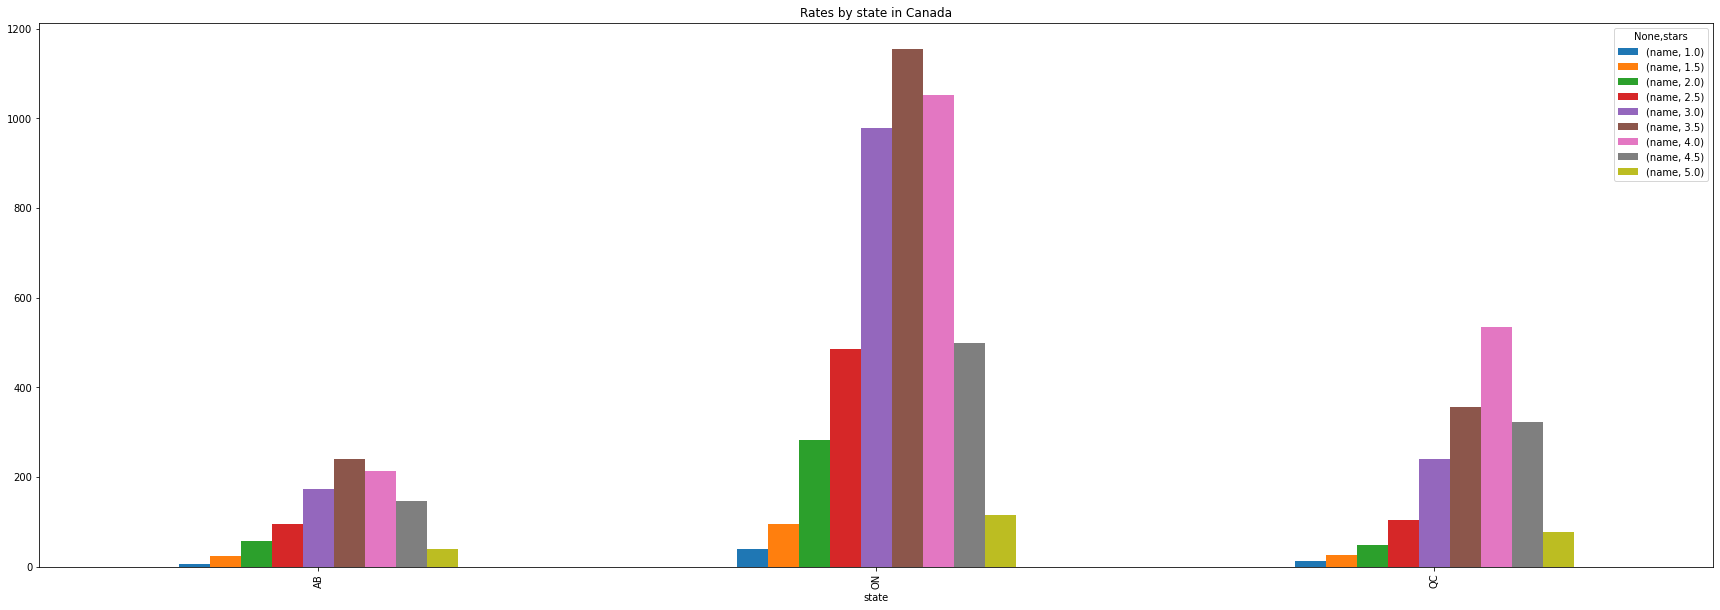

In [54]:
ratevsstateCA=pd.pivot_table(canada_restaurants_df,index=["state"],columns="stars",values=["name"], aggfunc="count",fill_value=0)
print(ratevsstateCA)
ratevsstateCA.loc[['AB','ON','QC']].plot.bar(title="Rates by state in Canada", figsize=(30,10))

stars  1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.0
state                                             
AZ      35  110  276  383  623  779  855  508  174
CO       0    0    1    0    0    0    0    0    0
IL       2    5   15   25   44   37   32   25    3
NC      11   54   85  127  237  329  346  218   56
NV      12   51  162  269  422  528  579  401  112
NY       0    0    0    2    0    0    1    1    0
OH      23   54  104  190  287  371  430  214   65
PA       6   29   65  117  224  267  295  232   61
SC       1    5   13   15   28   30   27   18    9
TX       0    0    1    0    0    0    0    0    0
WI       4    6   30   58   95  111  137   88   25


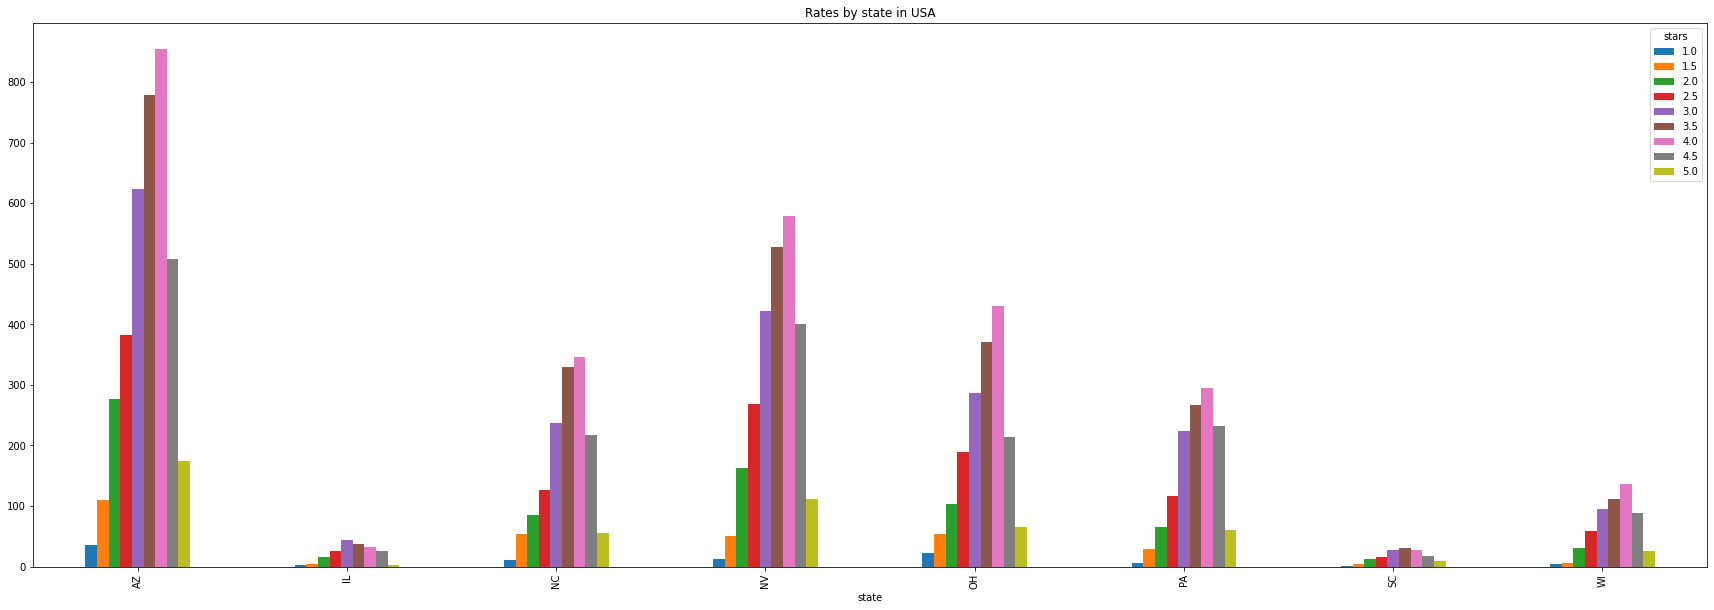

In [70]:
ratevsstateUSA=pd.pivot_table(usa_restaurants_df,index=["state"],columns="stars",values="name", aggfunc="count", fill_value=0 )
print (ratevsstateUSA)
ratevsstateUSA.loc[['AZ','IL', 'NC', 'NV','OH','PA','SC','WI']].plot.bar(title="Rates by state in USA", figsize=(30,10))